## Unveiling the Android App Market: Analyzing Google Play Store Data

In [1]:
import pandas as pd
df1 = pd.read_csv('apps.csv')
df2 = pd.read_csv('user_reviews.csv')

# Display the first few rows of each DataFrame
df1.head(), df2.head()

(   Unnamed: 0                                                App  \
 0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
 1           1                                Coloring book moana   
 2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
 3           3                              Sketch - Draw & Paint   
 4           4              Pixel Draw - Number Art Coloring Book   
 
          Category  Rating  Reviews  Size     Installs  Type Price  \
 0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
 1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
 2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
 3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
 4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   
 
   Content Rating                     Genres      Last Updated  \
 0       Everyone               Art & Design   January 7, 2018   
 1       Everyone  Art & Desig

## Data Preparation

In [5]:
# Check for missing values and data types in both DataFrames
print(df1.info())
print(df2.info())

# Handling missing values (e.g., filling with mean/median or dropping)
df1 = df1.dropna()  # This is just an example; you may want to handle missing data differently
df2 = df2.dropna()

# After conversion, check the data types again
print(df1.dtypes)
print(df2.dtypes)

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7021 non-null   int64  
 1   App             7021 non-null   object 
 2   Category        7021 non-null   object 
 3   Rating          7021 non-null   float64
 4   Reviews         7021 non-null   int64  
 5   Size            7021 non-null   float64
 6   Installs        7021 non-null   object 
 7   Type            7021 non-null   object 
 8   Price           7021 non-null   object 
 9   Content Rating  7021 non-null   object 
 10  Genres          7021 non-null   object 
 11  Last Updated    7021 non-null   object 
 12  Current Ver     7021 non-null   object 
 13  Android Ver     7021 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 822.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   

## Category Exploration

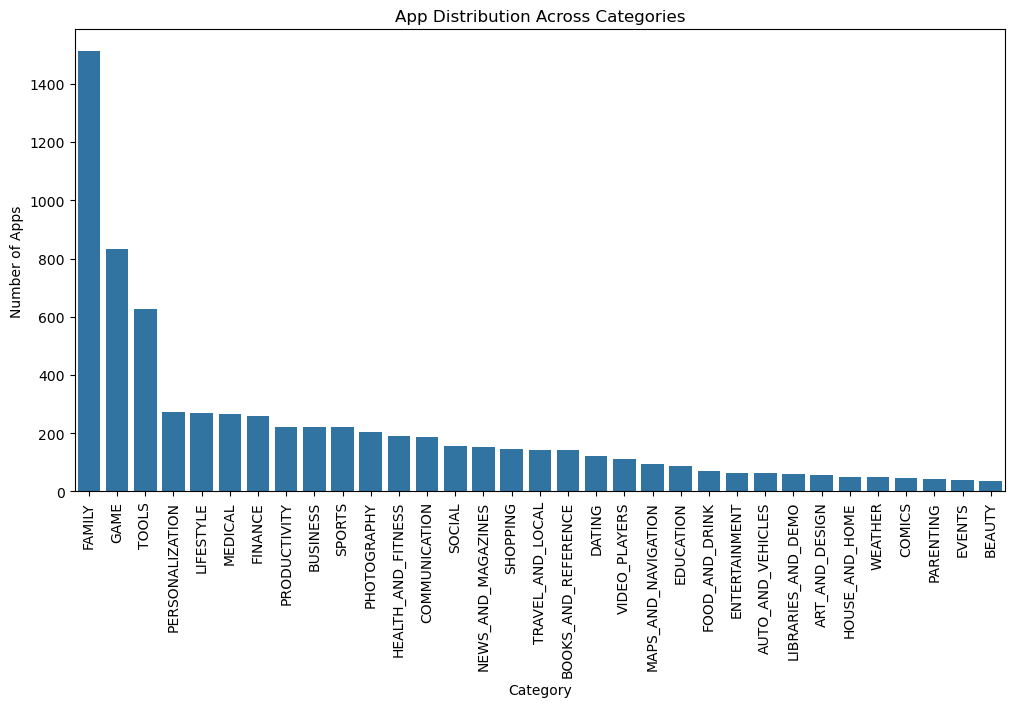

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming there's a 'Category' column in df1 or df2
category_distribution = df1['Category'].value_counts()

# Plotting the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values)
plt.xticks(rotation=90)
plt.title('App Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()


## Metrics Analysis

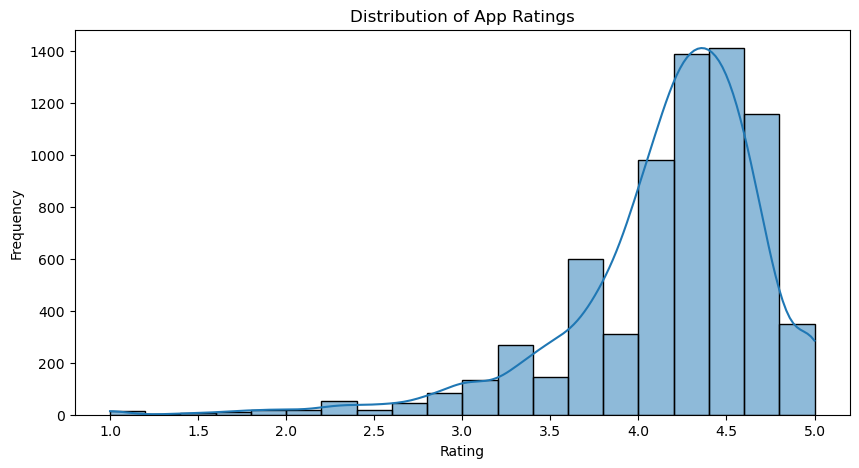

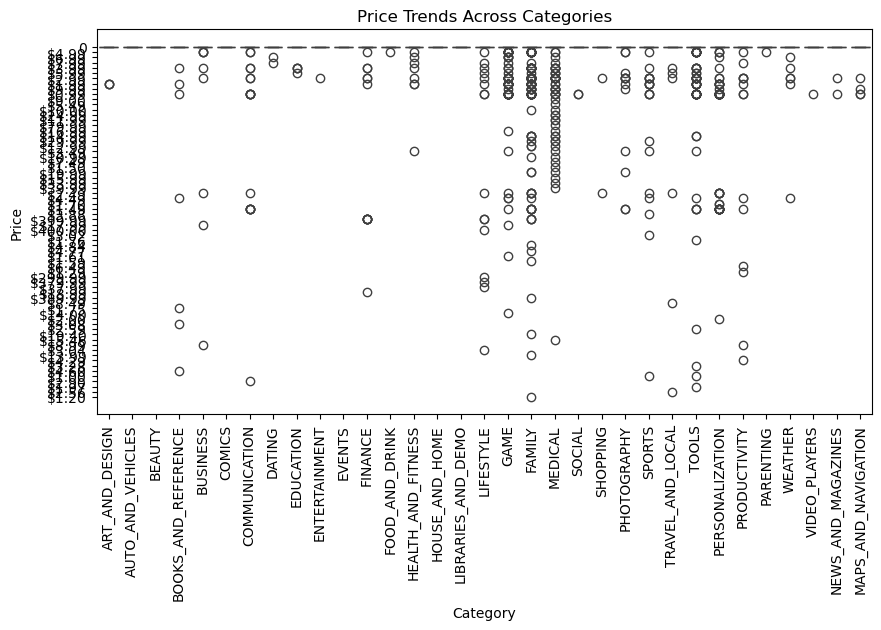

In [11]:
# Example: Distribution of app ratings
plt.figure(figsize=(10, 5))
sns.histplot(df1['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Example: Price trends 
plt.figure(figsize=(10, 5))
sns.boxplot(x=df1['Category'], y=df1['Price'])
plt.xticks(rotation=90)
plt.title('Price Trends Across Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()


##  Sentiment Analysis

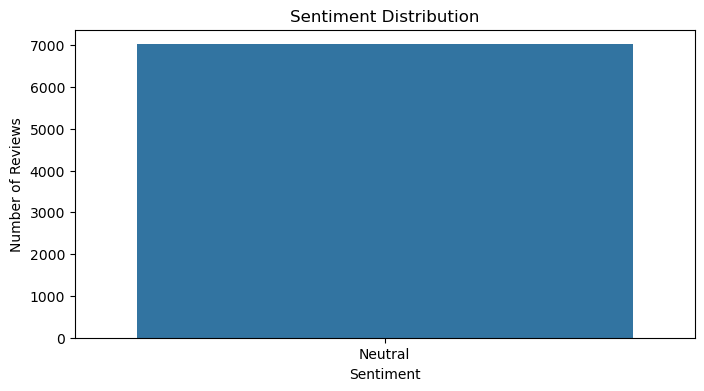

In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to handle sentiment analysis, ensuring reviews are strings
def get_vader_sentiment(review):
    # Ensure the review is a string, otherwise return 'Neutral'
    if isinstance(review, str):
        # Analyze the sentiment score
        score = analyzer.polarity_scores(review)
        # Classify as Positive, Negative, or Neutral based on the compound score
        if score['compound'] > 0.05:
            return 'Positive'
        elif score['compound'] < -0.05:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'  # Treat non-strings or missing data as 'Neutral'

# Apply the sentiment analysis function to the 'Reviews' column
df1['Sentiment'] = df1['Reviews'].apply(get_vader_sentiment)

# Sentiment distribution
sentiment_distribution = df1['Sentiment'].value_counts()

# Plotting sentiment distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

## Interactive Visualization

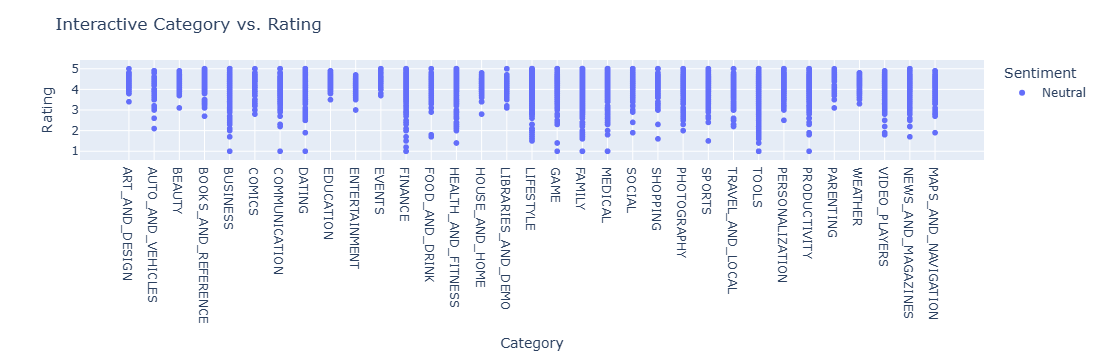

In [44]:
import plotly.express as px

# Example: Interactive Category vs. Rating plot
fig = px.scatter(df1, x='Category', y='Rating', color='Sentiment', hover_data=['App'])
fig.update_layout(title='Interactive Category vs. Rating', xaxis_title='Category', yaxis_title='Rating')
fig.show()


## Skill Enhancement

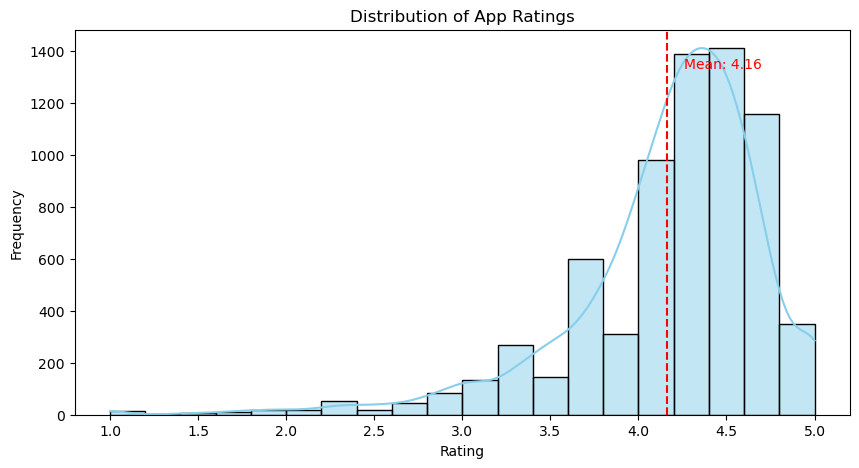

In [46]:
# Example of adding annotations and using a specific color palette
plt.figure(figsize=(10, 5))
sns.histplot(df1['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Annotating the mean
mean_rating = df1['Rating'].mean()
plt.axvline(mean_rating, color='red', linestyle='--')
plt.text(mean_rating + 0.1, plt.ylim()[1]*0.9, f'Mean: {mean_rating:.2f}', color='red')

plt.show()
